# Computer Vision  : Image Classifcation
# NLP: Natural Language Processing: Text Classification


In [5]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [16]:
len(train_data[1])

189

In [18]:
train_labels.shape

(25000,)

In [28]:
rain_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [30]:
type(train_data[0])

list

In [32]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [34]:
imdb.get_word_index()['brilliant']

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


527

In [38]:
imdb.get_word_index()['more']

50

In [40]:
len(imdb.get_word_index())

88584

In [42]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [68]:
reverse_word_index.get(1408)

'woods'

In [17]:
# # d = {'fawn': 34701,
#  'tsukino': 52006,
#  'nunnery': 52007,
#  'sonja': 16816,
#  'vani': 63951}

In [21]:
# dict([(v,k) for k,v in d.items()])

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani'}

In [ ]:
# d['vani']

In [26]:
# d.get('vanii', 'value not found')

'value not found'

In [ ]:
# decoded_review

In [ ]:
# reverse_word_index.get(43)

In [70]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [72]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [73]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [74]:
x_train[0].sum()

120.0

In [75]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [76]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
                            layers.Dense(16, activation="relu"),
                            layers.Dense(16, activation="relu"),
                            layers.Dense(1, activation="sigmoid")
                        ])

In [77]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

## Simple Hold Out Validation

In [79]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [80]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.7429 - loss: 0.5521 - val_accuracy: 0.8651 - val_loss: 0.4302
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8915 - loss: 0.3477 - val_accuracy: 0.8759 - val_loss: 0.3323
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9198 - loss: 0.2526 - val_accuracy: 0.8853 - val_loss: 0.2907
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9342 - loss: 0.2029 - val_accuracy: 0.8864 - val_loss: 0.2809
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9459 - loss: 0.1686 - val_accuracy: 0.8836 - val_loss: 0.2860
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9553 - loss: 0.1426 - val_accuracy: 0.8851 - val_loss: 0.2820
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9639 - loss: 0.1211 - val_accuracy: 0.8858 - val_loss: 0.2929
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9693 - loss: 0.1039 - val_accuracy: 0.8841 - 

In [81]:
history_dict = history.history

In [82]:
import pandas as pd

In [83]:
pd.DataFrame(history_dict)

,accuracy,loss,val_accuracy,val_loss
0,0.742933,0.552057,0.8651,0.430241
1,0.891533,0.347694,0.8759,0.332326
2,0.919800,0.252623,0.8853,0.290669
3,0.934200,0.202871,0.8864,0.280927
4,0.945933,0.168579,0.8836,0.286033
5,0.955267,0.142624,0.8851,0.282006
6,0.963867,0.121065,0.8858,0.292913
7,0.969267,0.103871,0.8841,0.307014
8,0.975333,0.088317,0.8819,0.319537
9,0.979000,0.079106,0.8821,0.339548


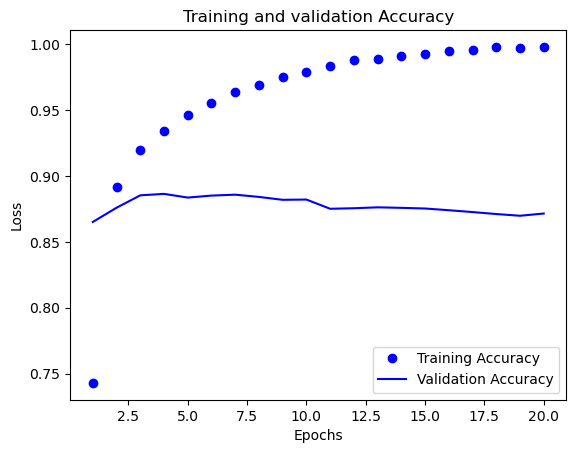

In [84]:
import matplotlib.pyplot as plt

loss_values = history_dict["accuracy"]
val_loss_values = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training Accuracy")
plt.plot(epochs, val_loss_values, "b", label="Validation Accuracy")
plt.title("Training and validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

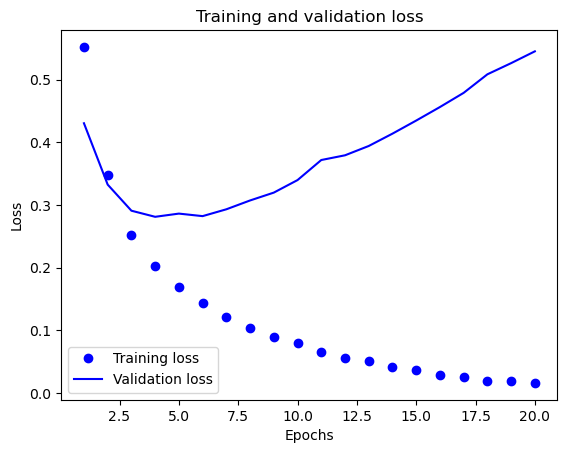

In [85]:
import matplotlib.pyplot as plt

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [86]:
model = keras.Sequential([
layers.Dense(16, activation="relu"),
layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [1]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

NameError: name 'model' is not defined

In [88]:
for p in model.predict(x_test):
    if p >=0.5:
        print("Positvie")
    else:
        print("Negative")

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Negative
Positvie
Positvie
Positvie
Positvie
Positvie
Positvie
Negative
Positvie
Positvie
Positvie
Negative
Negative
Negative
Positvie
Negative
Positvie
Positvie
Negative
Negative
Positvie
Positvie
Negative
Positvie
Positvie
Positvie
Negative
Positvie
Positvie
Negative
Positvie
Negative
Positvie
Negative
Negative
Negative
Positvie
Positvie
Negative
Negative
Positvie
Positvie
Negative
Positvie
Positvie
Positvie
Negative
Negative
Negative
Negative
Negative
Negative
Positvie
Positvie
Positvie
Negative
Positvie
Positvie
Negative
Positvie
Negative
Negative
Positvie
Negative
Negative
Positvie
Negative
Positvie
Positvie
Positvie
Positvie
Positvie
Positvie
Negative
Negative
Negative
Negative
Positvie
Positvie
Negative
Negative
Negative
Negative
Positvie
Negative
Negative
Negative
Positvie
Negative
Positvie
Positvie
Negative
Negative
Positvie
Positvie
Negative
Positvie
Positvie
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negat